In [1]:
import numpy as np
import gym 
import random

# Create the Environment

In [2]:
from gym.envs.registration import register
register(
id='FrozenLakeNotSlippery-v0',
entry_point='gym.envs.toy_text:FrozenLakeEnv',
kwargs={'map_name' : '4x4', 'is_slippery': False},
max_episode_steps=100,
reward_threshold=0.78, # optimum = .8196
)
env = gym.make("FrozenLakeNotSlippery-v0")

In [3]:
env = gym.make('FrozenLake-v0')

In [4]:
action_size = env.action_space.n
state_size = env.observation_space.n

qtable = np.zeros((state_size, action_size))
print(qtable.shape)

(16, 4)


There are 16 states (squares) with 4 actions in each.

# Hyperparameters 

These control the learning process.

In [5]:
total_episodes = 10000
learning_rate = 0.8
max_steps = 99
gamma = 0.95

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01

# Q Learning Algorithm

In [18]:
rewards = []
qtable = np.zeros((state_size, action_size))

total_episodes = 100000
learning_rate = 0.8
max_steps = 99
gamma = 0.95

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001
count = 0

for episode in range(total_episodes):
    
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    # Take maximum of max steps
    for step in range(max_steps):
        exp_exp_tradeoff = random.uniform(0, 1)
        
        # If exploit, choose the maximum action for the state
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state, :])
            
        # If explore, randomly choose an action from the action space
        else:
            action = env.action_space.sample()
        
        # Take the action
        new_state, reward, done, info = env.step(action)
        
        # Update qtable
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        total_rewards += reward
        
        # Now in new state
        state = new_state
        
        if done:
            break
            
    rewards.append(total_rewards)

    # Decay the explore exploit tradeoff to favor more exploit over time
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)

    if episode % 10000 == 0:
        print(f'Episode: {episode}, average rewards: {round(np.mean(rewards), 3)}')

Episode: 0, average rewards: 0.0
Episode: 1000, average rewards: 0.039
Episode: 2000, average rewards: 0.059
Episode: 3000, average rewards: 0.09
Episode: 4000, average rewards: 0.148
Episode: 5000, average rewards: 0.197
Episode: 6000, average rewards: 0.235
Episode: 7000, average rewards: 0.262
Episode: 8000, average rewards: 0.291
Episode: 9000, average rewards: 0.311
Episode: 10000, average rewards: 0.33
Episode: 11000, average rewards: 0.346
Episode: 12000, average rewards: 0.361
Episode: 13000, average rewards: 0.372
Episode: 14000, average rewards: 0.381
Episode: 15000, average rewards: 0.389
Episode: 16000, average rewards: 0.396
Episode: 17000, average rewards: 0.4
Episode: 18000, average rewards: 0.407
Episode: 19000, average rewards: 0.41
Episode: 20000, average rewards: 0.413
Episode: 21000, average rewards: 0.419
Episode: 22000, average rewards: 0.421
Episode: 23000, average rewards: 0.425
Episode: 24000, average rewards: 0.429
Episode: 25000, average rewards: 0.435
Episod

In [14]:
def cum_mean(x):
    """Cumulative mean of list"""
    total = 0
    values = []
    for i, value in enumerate(x):
        total += value
        values.append(total / (i + 1))

    return values

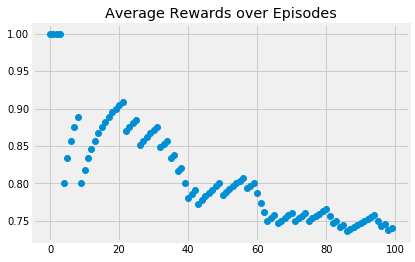

In [21]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

plt.plot(cum_mean(rewards), 'o');
plt.title('Average Rewards over Episodes');

In [19]:
rewards = []

for i in range(100):
    game_rewards = 0
    state = env.reset()
    
    for step in range(max_steps):
        action = np.argmax(qtable[state, :])
        
        new_state, reward, done, info = env.step(action)
        game_rewards += reward
        
        state = new_state
        
        if done:
            break
            
    rewards.append(game_rewards)
    
    if i % 10 == 0:
        print(f'Game {i} Current Reward {game_rewards}')
        
print(f'\nPercentage of games reaching goal: {100 * np.mean(np.array(rewards) == 1)}')

Game 0 Current Reward 1.0
Game 10 Current Reward 1.0
Game 20 Current Reward 1.0
Game 30 Current Reward 1.0
Game 40 Current Reward 0.0
Game 50 Current Reward 0.0
Game 60 Current Reward 0.0
Game 70 Current Reward 1.0
Game 80 Current Reward 1.0
Game 90 Current Reward 1.0

Percentage of games reaching goal: 74.0


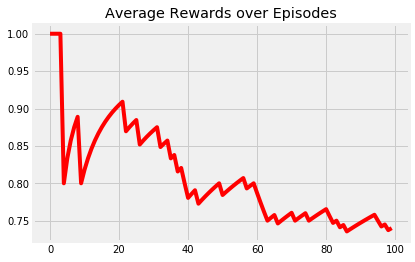

In [20]:
plt.plot(cum_mean(rewards), 'r')
plt.title('Average Rewards over Episodes');